In [27]:
import numpy as np
import pandas as pd

def get_fitness(dir):
    criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

    fitness_header = ["DOL","DVE","DPD","DSM","DFD"]

    criterion = pd.read_csv(dir+'criterion.csv',names=criterion_header)
    fitness = pd.read_csv(dir+'fitness.csv',names=fitness_header)
    result = pd.DataFrame()
    
    result['RouteCompletionTest']   =   criterion["RouteCompletionTest_figure"]/100
    result['OutsideRouteLanesTest'] = 1-criterion["OutsideRouteLanesTest_figure"]/100
    result['CollisionTest']         =   criterion["CollisionTest"]
    result['RunningRedLightTest']   = 1-criterion["RunningRedLightTest"]
    result['RunningStopTest']       = 1-criterion["RunningStopTest"]
    result['InRouteTest']           = 1-criterion["InRouteTest"]
    result['AgentBlockedTest']      = 1-criterion["AgentBlockedTest"]
    result['Timeout']               = 1-criterion["Timeout"]
    
    DVE = fitness['DVE'].copy()/2
    DVE[fitness['DVE'] >= 2] = 1

    collisionTest = result['CollisionTest'].copy()
    collisionTest[result['CollisionTest']==0] = DVE[result['CollisionTest']==0]
    collisionTest[result['CollisionTest']==1] = 0

    result.loc[:,'CollisionTest'] = collisionTest
    
    return result

In [28]:
continuous_data = '../../data/routes_short_2023-06-09|17:27:05/'
withoutfog_data = '../../data/routes_short_2023-06-23|17:07:59/'
data_label = ['All Features', 'Without Fog'] 

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]

continuous_fitness = get_fitness(continuous_data)[select_criterions]
withoutfog_fitness = get_fitness(withoutfog_data)[select_criterions]
print(continuous_fitness.shape)
print(withoutfog_fitness.shape)

(390, 4)
(853, 4)


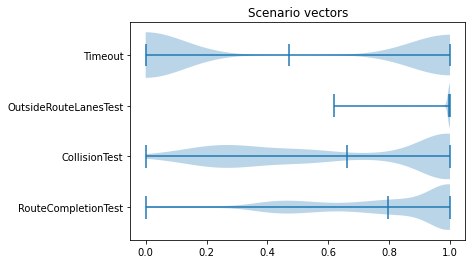

In [29]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
# vl1 = plt.violinplot(continuous_fitness, vert=False, showmeans=True, widths=0.9)
vl2 = plt.violinplot(withoutfog_fitness, vert=False, showmeans=True, widths=0.9)
plt.yticks(range(1, 5), select_criterions)
plt.title("Scenario vectors")
# plt.legend(handles=(vl1['cbars'],vl2['cbars']), 
#            labels=[data_label[0],data_label[1]],
#            labelcolor=['blue','orange'],
#            loc=3)

plt.show()

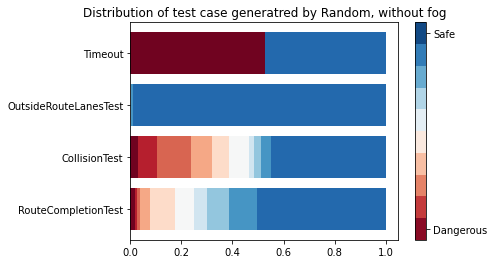

In [30]:
import matplotlib as mpl
cmap = mpl.cm.RdBu
colors = cmap(range(3,253,25))


stack_hist_discrete = np.concatenate([
    [np.histogram(withoutfog_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(withoutfog_fitness)],
    [np.histogram(withoutfog_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(withoutfog_fitness)],
    [np.histogram(withoutfog_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(withoutfog_fitness)],
    [np.histogram(withoutfog_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(withoutfog_fitness)],
])

left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4), width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.8)
    left += stack_hist_discrete[:,i]

plt.yticks(range(4), select_criterions)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ticklocation='right',values=range(10), ticks=[0, 9])
cbar.ax.set_yticklabels(['Dangerous', 'Safe'])  # vertically oriented colorbar

plt.title('Distribution of test case generatred by Random, without fog')
plt.show()

In [32]:
def denoise(data, label):
    data = data.reshape([80,10])
    median = np.percentile(data, 50, axis=1)

    iqr = np.percentile(data, 75, axis=1)-np.percentile(data, 25, axis=1)
    lower = np.percentile(data, 25, axis=1) - 1.5*(iqr)
    upper = np.percentile(data, 75, axis=1) + 1.5*(iqr)
    lower[lower<0] = 0
    upper[upper>1] = 1

    # lower = np.percentile(data, 25, axis=1)
    # upper = np.percentile(data, 75, axis=1)

    plt.plot(range(80), median, label=label)
    plt.fill_between(range(80), lower, upper, alpha=0.2)

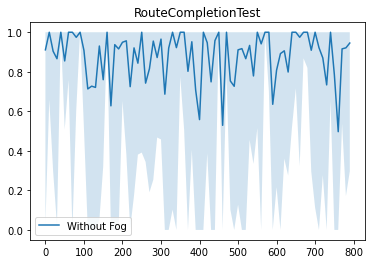

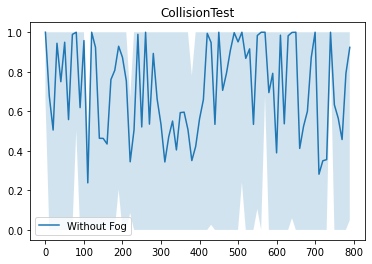

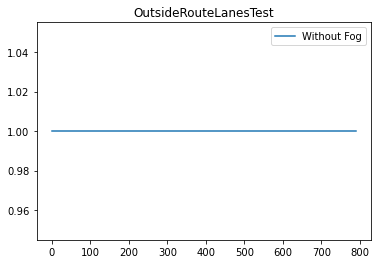

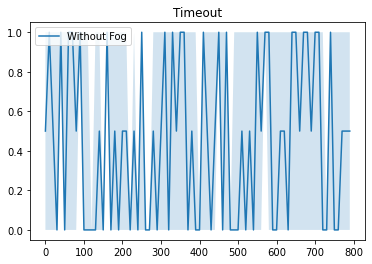

In [34]:

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]

for criterion in select_criterions:
    denoise(withoutfog_fitness[criterion].to_numpy()[:800], label='Without Fog')
    plt.xticks(range(0,81,10), range(0,805,100))
    plt.legend()
    plt.title(criterion)
    plt.show()

(853, 14)


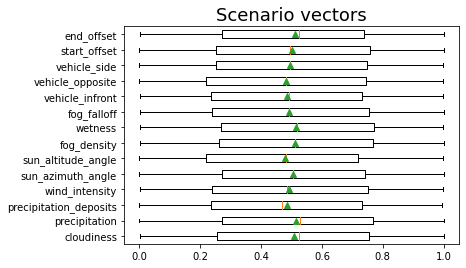

In [39]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

scenarios = pd.read_csv(withoutfog_data+'scenario.csv',names=scenario_header)
print(scenarios.shape)
        
# plt.figure(figsize=(20,2))
plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()

In [40]:
scenarios

,cloudiness,precipitation,precipitation_deposits,wind_intensity,sun_azimuth_angle,sun_altitude_angle,fog_density,wetness,fog_falloff,vehicle_infront,vehicle_opposite,vehicle_side,start_offset,end_offset
0,0.179615,0.636279,0.249874,0.147389,0.202680,0.797937,0.580154,0.193692,0.030827,0.630697,0.767599,0.586976,0.929127,0.224529
1,0.830101,0.710299,0.551572,0.117538,0.042869,0.650824,0.268605,0.910598,0.426743,0.881025,0.752985,0.536033,0.680336,0.435272
2,0.017204,0.070879,0.073382,0.666041,0.901505,0.638298,0.855928,0.726357,0.534469,0.267651,0.276354,0.096441,0.883661,0.703357
3,0.544267,0.259935,0.238991,0.539301,0.045754,0.950556,0.096047,0.438001,0.671879,0.287476,0.268773,0.300008,0.470342,0.079297
4,0.894962,0.782002,0.863170,0.477253,0.510473,0.995273,0.344006,0.272090,0.553510,0.767149,0.014372,0.391409,0.614771,0.402706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,0.364461,0.254728,0.247880,0.639427,0.268210,0.539659,0.382291,0.838495,0.007104,0.995136,0.068113,0.630324,0.535398,0.699973
849,0.079698,0.270276,0.707791,0.909284,0.834608,0.048579,0.508809,0.138507,0.038376,0.090999,0.723345,0.072703,0.402825,0.841244
850,0.247407,0.175937,0.771874,0.201260,0.927642,0.825107,0.982250,0.953061,0.218301,0.970062,0.557487,0.468332,0.391006,0.498114
851,0.172805,0.651350,0.813634,0.578508,0.268869,0.152751,0.662823,0.923844,0.032018,0.389123,0.815899,0.592089,0.919258,0.958306


In [45]:
withoutfog_fitness['OutsideRouteLanesTest'][withoutfog_fitness['OutsideRouteLanesTest']<0.8]

64     0.6186
212    0.7127
471    0.7101
Name: OutsideRouteLanesTest, dtype: float64